Data loading & Exploration

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview
print(df.shape)
df.head()


(429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


Explore the structure

In [2]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Check for missing values

In [3]:
df.isnull().sum().sort_values(ascending=False)


weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
                                            ...  
total_deaths                                17631
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

Data cleaning

In [4]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Filter selected countries
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Drop rows with missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths', 'date'])

# Handle missing numeric values
df.fillna(method='ffill', inplace=True)


C:\Users\edwin\AppData\Local\Temp\ipykernel_11116\2961307020.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Exploratory Data Analysis (EDA)

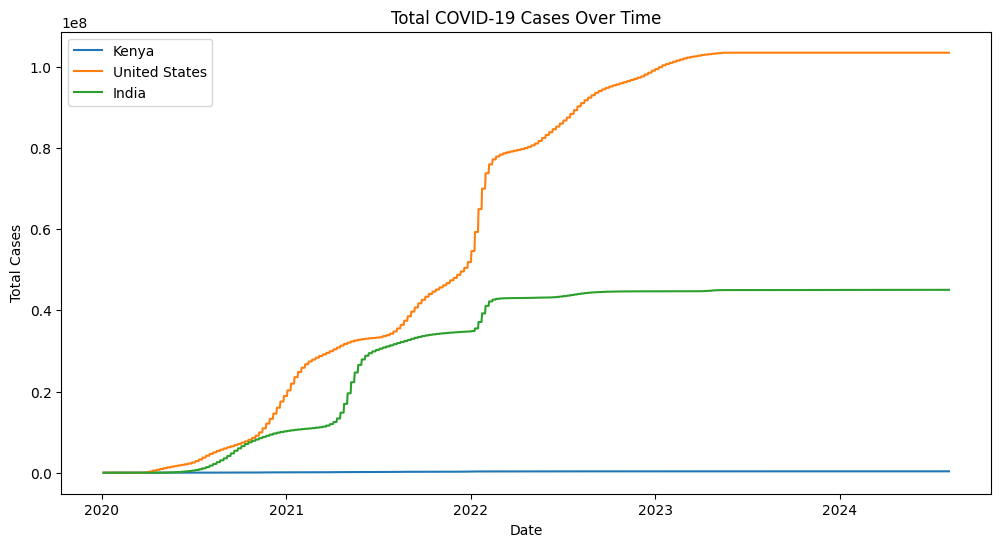

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()


bar chart


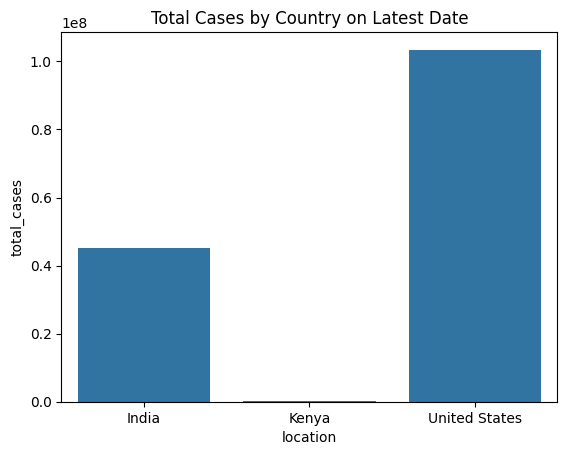

In [6]:
# Death Rate Column
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Bar chart of latest total cases
latest = df[df['date'] == df['date'].max()]
sns.barplot(data=latest, x='location', y='total_cases')
plt.title('Total Cases by Country on Latest Date')
plt.show()


Visualizing Vaccination Progress

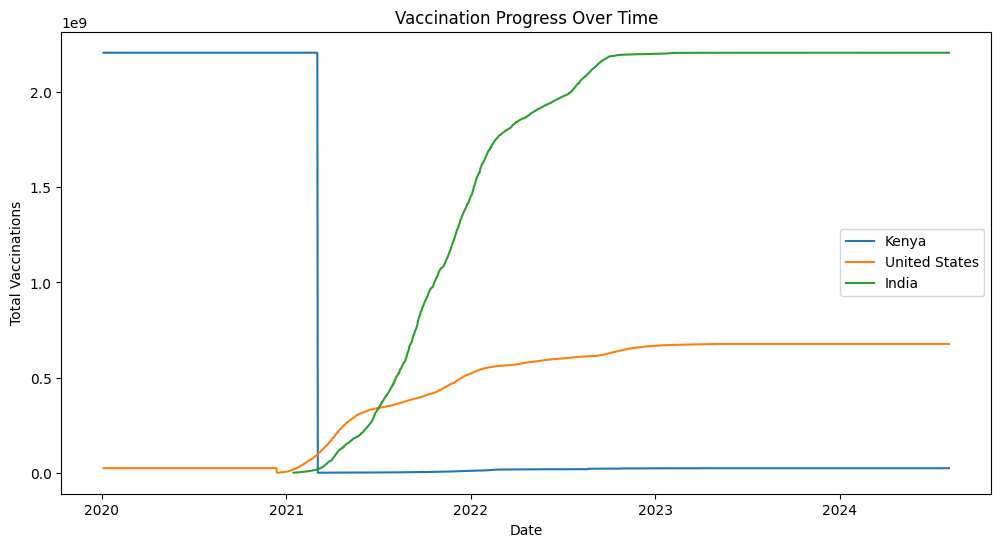

In [7]:
# Line chart of total vaccinations
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


Building a Choropleth map

In [9]:
import plotly.express as px

# Get latest data per country
latest_data = df[df['date'] == df['date'].max()]
choropleth_df = latest_data[['iso_code', 'location', 'total_cases']].dropna()

fig = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    title="Global COVID-19 Total Cases",
    color_continuous_scale="Reds"
)
fig.show()


# Insights and Reporting

- 🇮🇳 India had the highest number of total cases among selected countries by [latest date].
- 🇺🇸 The United States had earlier vaccination growth compared to Kenya and India.
- The death rate fluctuated but remained under 2% in most regions.
- Vaccination data was sparse for early 2020.
- Kenya's vaccination rollout began significantly later than the U.S. and India